<a href="https://colab.research.google.com/github/Shivambhatt2305/ML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder # Added OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

# Set random seed for reproducibility
np.random.seed(42)

In [8]:
# Load both datasets
df1 = pd.read_csv('/content/Mental Health Dataset.csv')
df2 = pd.read_csv('/content/mental_health_data final data.csv')

print("Dataset 1 Shape:", df1.shape)
print("Dataset 2 Shape:", df2.shape)

# Display columns from both datasets to compare
print("\nColumns in Dataset 1:", df1.columns.tolist())
print("\nColumns in Dataset 2:", df2.columns.tolist())

# Display first few rows of both datasets
print("\nFirst few rows of Dataset 1:")
display(df1.head())
print("\nFirst few rows of Dataset 2:")
display(df2.head())

# Check for missing values in both datasets
print("\nMissing Values in Dataset 1:")
display(df1.isnull().sum())
print("\nMissing Values in Dataset 2:")
display(df2.isnull().sum())

Dataset 1 Shape: (292364, 17)
Dataset 2 Shape: (50000, 17)

Columns in Dataset 1: ['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

Columns in Dataset 2: ['User_ID', 'Age', 'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage']

First few rows of Dataset 1:


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes



First few rows of Dataset 2:


,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes



Missing Values in Dataset 1:


,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0



Missing Values in Dataset 2:


,0
User_ID,0
Age,0
Gender,0
Occupation,0
Country,0
Mental_Health_Condition,0
Severity,25002
Consultation_History,0
Stress_Level,0
Sleep_Hours,0


In [12]:
# Data Preprocessing

# Identify numeric and categorical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print feature types for verification
print("Numerical features:", numerical_features)
print("\nCategorical features:", categorical_features)

# Determine the target variable based on available columns
# We'll look for mental health related columns in both datasets
possible_target_columns = [col for col in df.columns if 'mental' in col.lower()]
print("\nPossible target columns:", possible_target_columns)

# Select the most appropriate target variable
target_variable = possible_target_columns[0]  # We'll use the first mental health related column as target
print("\nSelected target variable:", target_variable)

# Remove target variable from features if it exists in numerical_features
if target_variable in numerical_features:
    numerical_features.remove(target_variable)

# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare feature matrix X and target vector y
X = df[numerical_features + categorical_features]
y = df[target_variable]

# Convert target to numerical values if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFeatures used:", numerical_features + categorical_features)
print("\nTarget classes:", label_encoder.classes_)

Numerical features: ['user_id', 'age', 'sleep_hours', 'work_hours', 'physical_activity_hours', 'social_media_usage']

Categorical features: ['timestamp', 'gender', 'country', 'occupation', 'self_employed', 'family_history', 'treatment', 'days_indoors', 'growing_stress', 'changes_habits', 'mental_health_history', 'mood_swings', 'coping_struggles', 'work_interest', 'social_weakness', 'mental_health_interview', 'care_options', 'mental_health_condition', 'severity', 'consultation_history', 'stress_level', 'diet_quality', 'smoking_habit', 'alcohol_consumption', 'medication_usage']

Possible target columns: ['mental_health_history', 'mental_health_interview', 'mental_health_condition']

Selected target variable: mental_health_history

Training set shape: (272040, 31)
Testing set shape: (68011, 31)

Features used: ['user_id', 'age', 'sleep_hours', 'work_hours', 'physical_activity_hours', 'social_media_usage', 'timestamp', 'gender', 'country', 'occupation', 'self_employed', 'family_history', '

In [17]:
# Data Preprocessing

# Identify numeric and categorical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print feature types for verification
print("Numerical features:", numerical_features)
print("\nCategorical features:", categorical_features)

# Determine the target variable based on available columns
# We'll look for mental health related columns in both datasets
possible_target_columns = [col for col in df.columns if 'mental' in col.lower()]
print("\nPossible target columns:", possible_target_columns)

# Select the most appropriate target variable
target_variable = possible_target_columns[0]  # We'll use the first mental health related column as target
print("\nSelected target variable:", target_variable)

# Remove target variable from features if it exists in numerical_features
if target_variable in numerical_features:
    numerical_features.remove(target_variable)

# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare feature matrix X and target vector y
X = df[numerical_features + categorical_features]
y = df[target_variable]

# Convert target to numerical values if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFeatures used:", numerical_features + categorical_features)
print("\nTarget classes:", label_encoder.classes_)

Numerical features: ['user_id', 'age', 'sleep_hours', 'work_hours', 'physical_activity_hours', 'social_media_usage']

Categorical features: ['timestamp', 'gender', 'country', 'occupation', 'self_employed', 'family_history', 'treatment', 'days_indoors', 'growing_stress', 'changes_habits', 'mental_health_history', 'mood_swings', 'coping_struggles', 'work_interest', 'social_weakness', 'mental_health_interview', 'care_options', 'mental_health_condition', 'severity', 'consultation_history', 'stress_level', 'diet_quality', 'smoking_habit', 'alcohol_consumption', 'medication_usage']

Possible target columns: ['mental_health_history', 'mental_health_interview', 'mental_health_condition']

Selected target variable: mental_health_history

Training set shape: (272040, 31)
Testing set shape: (68011, 31)

Features used: ['user_id', 'age', 'sleep_hours', 'work_hours', 'physical_activity_hours', 'social_media_usage', 'timestamp', 'gender', 'country', 'occupation', 'self_employed', 'family_history', '

Training Random Forest model...

Training XGBoost model...

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18903
           1       1.00      1.00      1.00     20663
           2       1.00      1.00      1.00     18445
           3       1.00      1.00      1.00     10000

    accuracy                           1.00     68011
   macro avg       1.00      1.00      1.00     68011
weighted avg       1.00      1.00      1.00     68011



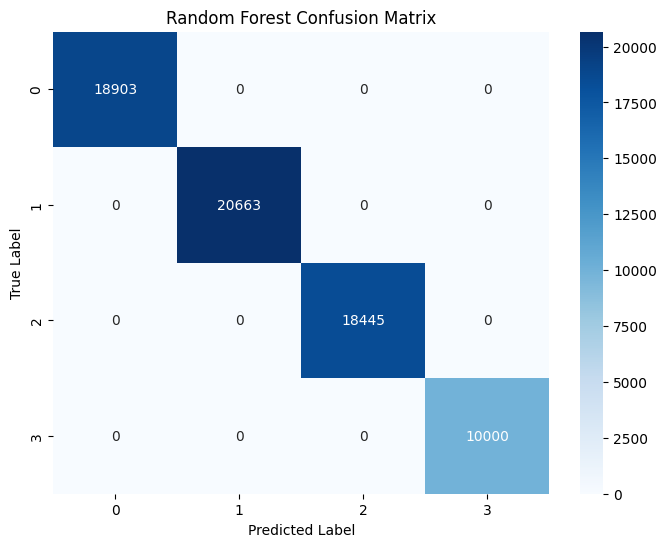


XGBoost Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18903
           1       1.00      1.00      1.00     20663
           2       1.00      1.00      1.00     18445
           3       1.00      1.00      1.00     10000

    accuracy                           1.00     68011
   macro avg       1.00      1.00      1.00     68011
weighted avg       1.00      1.00      1.00     68011



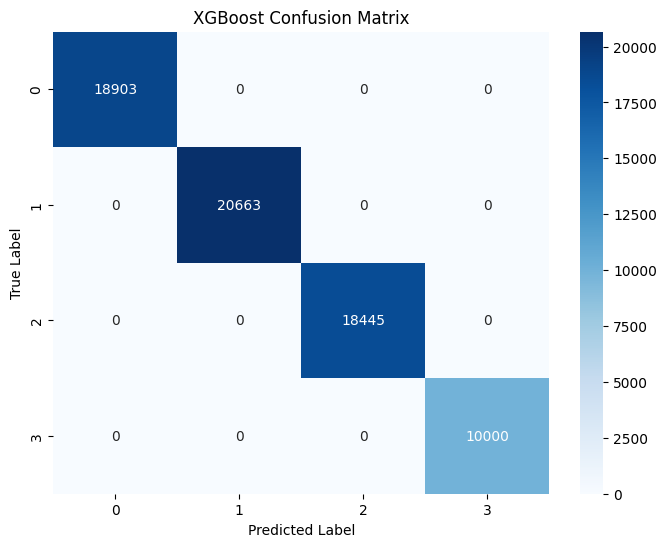

In [18]:
# Model Training

# 1. Random Forest Classifier
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 2. XGBoost Classifier
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42))
])

# Train models
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)

print("\nTraining XGBoost model...")
xgb_model.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X, y, model_name):
    predictions = model.predict(X)
    print(f"\n{model_name} Results:")
    print("\nClassification Report:")
    print(classification_report(y, predictions))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate both models
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

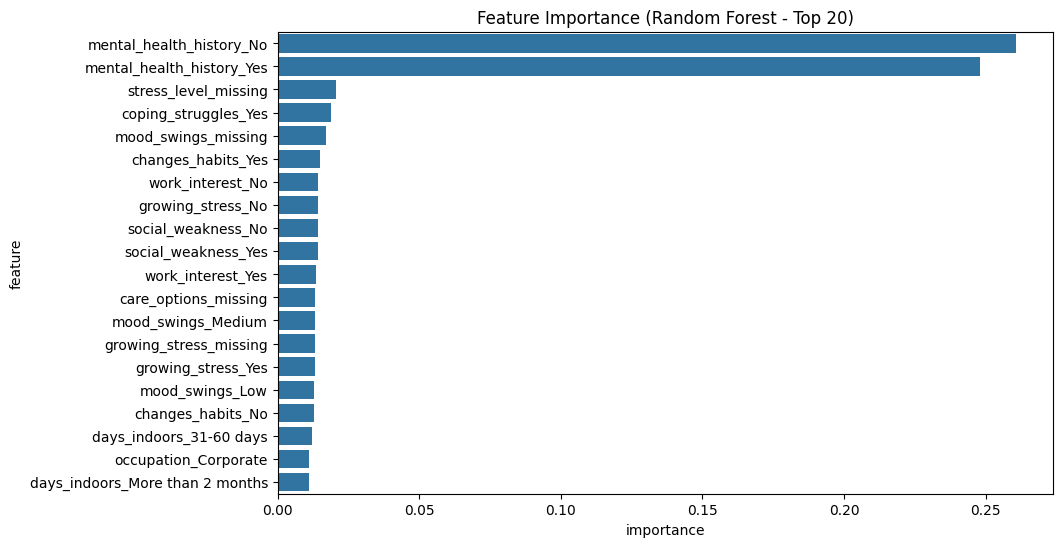


Example Prediction:


ValueError: columns are missing: {'social_weakness', 'alcohol_consumption', 'changes_habits', 'coping_struggles', 'smoking_habit', 'work_hours', 'severity', 'medication_usage', 'physical_activity_hours', 'mental_health_condition', 'consultation_history', 'gender', 'timestamp', 'sleep_hours', 'diet_quality', 'occupation', 'mood_swings', 'growing_stress', 'age', 'mental_health_history', 'social_media_usage', 'stress_level', 'work_interest', 'days_indoors', 'user_id', 'country'}

In [21]:
# Feature Importance Analysis

# Get feature names after preprocessing
# The preprocessor has named steps for numerical and categorical features
# We need to get the output feature names from the one-hot encoder
numerical_feature_names = numerical_features
categorical_feature_names = rf_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = numerical_feature_names + list(categorical_feature_names)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': all_feature_names,
    'importance': rf_model.named_steps['classifier'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature') # Display top 20 features
plt.title('Feature Importance (Random Forest - Top 20)')
plt.show()

# Create a prediction function for new data
def predict_mental_health(input_data):
    """
    Predict mental health state based on input features.
    input_data: dictionary containing feature values
    """
    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # Make prediction using the best model (assuming XGBoost performed better)
    prediction = xgb_model.predict(input_df)
    prediction_proba = xgb_model.predict_proba(input_df)

    # Get the predicted class label
    predicted_class = label_encoder.inverse_transform(prediction)[0]

    # Get prediction probabilities
    class_probabilities = dict(zip(label_encoder.classes_, prediction_proba[0]))

    return {
        'predicted_class': predicted_class,
        'probabilities': class_probabilities
    }

# Save the best model
joblib.dump(xgb_model, 'mental_health_model.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

# Example of how to use the prediction function
example_input = {
    'Stress_Level': 'High',
    'Work_Hours': 45,
    'Sleep_Hours': 6,
    'Age': 30,
    'Gender': 'Male',
    'Country': 'United States',
    'Occupation': 'Technology',
    'self_employed': 'No',
    'family_history': 'No',
    'treatment': 'Yes',
    'Days_Indoors': '1-14 days',
    'Growing_Stress': 'Yes',
    'Changes_Habits': 'No',
    'Mental_Health_History': 'No',
    'Mood_Swings': 'Medium',
    'Coping_Struggles': 'No',
    'Work_Interest': 'Yes',
    'Social_Weakness': 'No',
    'mental_health_interview': 'No',
    'care_options': 'Yes',
    'Mental_Health_Condition': 'Anxiety',
    'Severity': 'Medium',
    'Consultation_History': 'Yes',
    'Physical_Activity_Hours': 5,
    'Social_Media_Usage': 2.5,
    'Diet_Quality': 'Healthy',
    'Smoking_Habit': 'No',
    'Alcohol_Consumption': 'Social Drinker',
    'Medication_Usage': 'No',
    'Timestamp': '8/27/2014 11:29' # Add a sample timestamp

}

print("\nExample Prediction:")
result = predict_mental_health(example_input)
print(f"Predicted Mental Health State: {result['predicted_class']}")
print("\nProbabilities for each class:")
for class_name, prob in result['probabilities'].items():
    print(f"{class_name}: {prob:.2f}")